In [10]:
import time
import psutil
import os
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import csv

In [ ]:
def run_notebook_and_measure(path_to_notebook):
    print(f"Running: {path_to_notebook}")

    # Inicializa medición de recursos
    process = psutil.Process(os.getpid())
    cpu_start = psutil.cpu_percent(interval=None)
    mem_start = process.memory_info().rss / 1024 ** 2  # MB

    start_time = time.time()

    # Ejecuta el notebook
    with open(path_to_notebook) as f:
        nb = nbformat.read(f, as_version=4)

    ep = ExecutePreprocessor(timeout=1800, kernel_name='python3')
    ep.preprocess(nb, {'metadata': {'path': './'}})

    end_time = time.time()
    cpu_end = psutil.cpu_percent(interval=None)
    mem_end = process.memory_info().rss / 1024 ** 2
 
    #wall_time  Este es el tiempo total de ejecución en segundos del notebook medido desde el inicio hasta el final.
    #cpu_percent Es el porcentaje promedio de uso de CPU al final de la ejecución.
    #ram_used_mb Esto indica el aumento de uso de RAM durante la ejecución del notebook.
    return {
        "wall_time": end_time - start_time,
        "cpu_percent": cpu_end,
        "ram_used_mb": mem_end - mem_start
    }

In [ ]:
results = {
    "pennylane": [],
    "paddle": []
}

for i in range(2):
    #res_penny = run_notebook_and_measure("app/algorithms/Output/solution_clean_pennylane.ipynb")
    res_paddle = run_notebook_and_measure("solution_clean_paddle.ipynb")
    #results["pennylane"].append(res_penny)
    results["paddle"].append(res_paddle)

Running: solution_clean_paddle.ipynb
Running: solution_clean_paddle.ipynb


Promedios Pennylane:
Promedios Paddle:
wall_time      114.415625
cpu_percent      3.650000
ram_used_mb      4.121094
dtype: float64


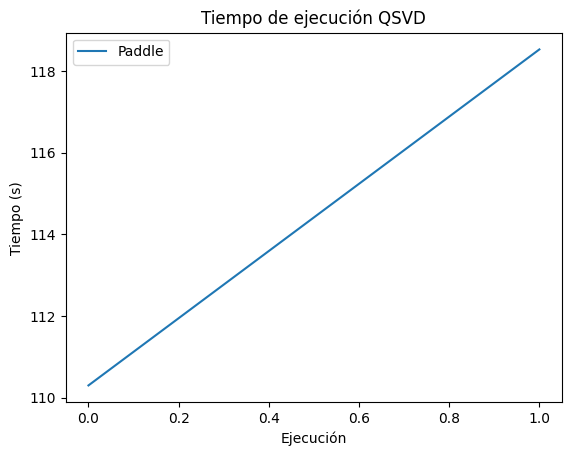

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#df_penny = pd.DataFrame(results["pennylane"])
df_paddle = pd.DataFrame(results["paddle"])

print("Promedios Pennylane:")
#print(df_penny.mean())

print("Promedios Paddle:")
print(df_paddle.mean())

# Graficar tiempo
#plt.plot(df_penny["wall_time"], label="Pennylane")
plt.plot(df_paddle["wall_time"], label="Paddle")
plt.ylabel("Tiempo (s)")
plt.xlabel("Ejecución")
plt.title("Tiempo de ejecución QSVD")
plt.legend()
plt.show()


In [ ]:
output_path = "Output/qsvd_results.csv"

# Abre el archivo en modo escritura
with open(output_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Escribir encabezado
    writer.writerow(["Source", "wall_time", "cpu_percent", "ram_used_mb"])
    
    # Escribir resultados de Pennylane
    for res in results["pennylane"]:
        writer.writerow(["solution_clean_pennylane.ipynb", res["wall_time"], res["cpu_percent"], res["ram_used_mb"]])
    
    # Escribir resultados de Paddle
    for res in results["paddle"]:
        writer.writerow(["solution_clean_paddle.ipynb", res["wall_time"], res["cpu_percent"], res["ram_used_mb"]])
